# Linear Regression
Using various predictors to predict calories

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
food = pd.read_excel("food.xlsx", sheet_name="food")

food.head()


,Category,Description,Nutrient Data Bank Number,carbohydrate,cholesterol,fiber,kilocalories,protein,sugar,water,monosaturated_fat,polysaturated_fat,saturated_fat,first_household_weight,first_household_weight_description,second_household_weight,second_household_weight_description,sodium
0,BUTTER,"BUTTER,WITH SALT",1001,0.06,215,0.0,717,0.85,0.06,15.87,21.021,3.043,51.368,227.00,1 cup,14,1 tbsp,576
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0.06,219,0.0,717,0.85,0.06,15.87,23.426,3.012,50.489,151.00,1 cup,9,1 tbsp,827
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0.00,256,0.0,876,0.28,0.00,0.24,28.732,3.694,61.924,205.00,1 cup,13,1 tbsp,2
3,CHEESE,"CHEESE,BLUE",1004,2.34,75,0.0,353,21.40,0.50,42.41,7.778,0.800,18.669,28.35,1 oz,17,1 cubic inch,1395
4,CHEESE,"CHEESE,BRICK",1005,2.79,94,0.0,371,23.24,0.51,41.11,8.598,0.784,18.764,132.00,"1 cup, diced",113,"1 cup, shredded",560


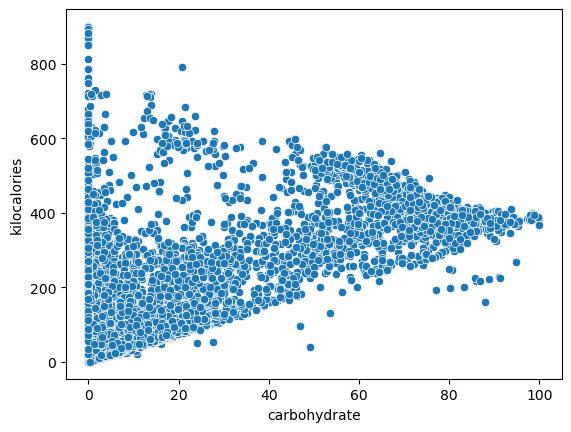

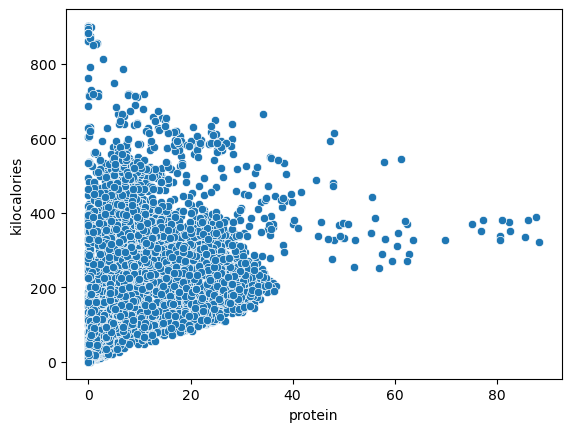

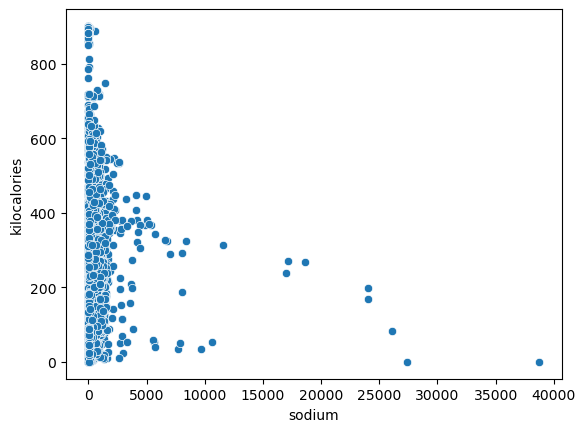

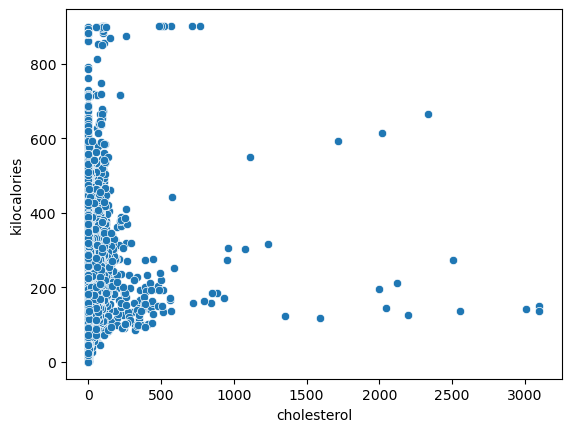

In [12]:
sns.scatterplot(x='carbohydrate', y='kilocalories', data=food)
plt.show()

sns.scatterplot(x='protein', y='kilocalories', data=food)
plt.show()

sns.scatterplot(x='sodium', y='kilocalories', data=food)
plt.show()

sns.scatterplot(x='cholesterol', y='kilocalories', data=food)
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


